In [1]:
import sys
import matplotlib as m

sys.path.append('..')
sys.path.append('../..')
sys.path.append('../../..')

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from absl import app
from absl import flags

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from dcc import AAV, Parameters
import numpy as np
import matplotlib.pyplot as plt

import patsy
from scipy.interpolate import BSpline

from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

This notebook explores how nodes spacing affet the quality of the fit for splines. Namely, is a data point close to the knot more valuable?

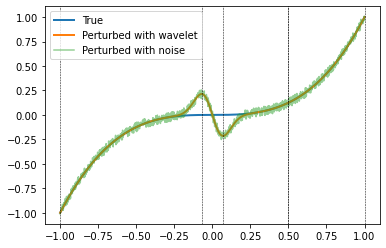

In [5]:
n_points = 1000
x_low = -1
x_high = 1
x = np.linspace(-1, 1, n_points, dtype='float32')
y_true = np.power(x, 3)
y_wave = np.power(x, 3) - 5 * x * np.exp(-100 * np.square(x))
y_perturbed = y_wave + np.random.uniform(-0.05, 0.05, n_points)
fig, ax = plt.subplots()
ax.plot(x, y_true, linewidth=2.0)
ax.plot(x, y_wave, linewidth=2.0)
ax.plot(x, y_perturbed, alpha=0.5)
ax.legend(['True', 'Perturbed with wavelet', 'Perturbed with noise'])

knots = [-1.0, 0.5, -0.07, 0.07, 0.5, 1.0]
for knot in knots:
    ax.axvline(knot, color='black', linewidth=0.5, linestyle='--')

In [7]:
def find_n_nearest(array, value, n=1):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [9]:
find_n_nearest(x, -0.07)

-0.06906907

In [11]:
k = np.array([1.0, 2.0, 3.0])

In [12]:
k.pop(1)

AttributeError: 'numpy.ndarray' object has no attribute 'pop'